# Forecast tax revenue growth of regions in Finland

Data source: vero.fi

Link: https://www.vero.fi/tietoa-verohallinnosta/tilastot/avoin_dat/

In [7]:
import pandas as pd
import numpy as np

## Process raw data

In [2]:
# Create the base with region column DataFrame
base_df = pd.read_csv('../data/Indices/population_density_index.csv')
base_df = base_df[['Region code', 'Region name (en)', 'Region name (fi)']].copy()
base_df.drop_duplicates(inplace=True)
base_df.reset_index(drop=True, inplace=True)

base_df

,Region code,Region name (en),Region name (fi)
0,MK01,Uusimaa,Uusimaa
1,MK02,Southwest Finland,Varsinais-Suomi
2,MK04,Satakunta,Satakunta
3,MK05,Kanta-Häme,Kanta-Häme
4,MK06,Pirkanmaa,Pirkanmaa
5,MK07,Päijät-Häme,Päijät-Häme
6,MK08,Kymenlaakso,Kymenlaakso
7,MK09,South Karelia,Etelä-Karjala
8,MK10,South Savo,Etelä-Savo
9,MK11,North Savo,Pohjois-Savo


In [3]:
# Load tax data
TAX_DF = pd.read_pickle('../data/tax_data/full_tax_data_with_region_and_industry.pkl.zip')
TAX_DF

,Year,Business_ID,Name,Tax_Region,Tax_Revenue,Total_Amount_Paid,Tax_Advance,Tax_Return,Residual_Tax,Municipality_Code,Municipality,Code of region,Name of region in Finnish,Section
0,2011,0568703-2,Brändö Lax Ab,035 BRÄNDÖ,857376.69,222917.94,222913.97,0.00,0.00,035,Ahvenanmaa,21.0,Ahvenanmaa,A
1,2011,0841712-6,Norrfjärden Ab,035 BRÄNDÖ,0.00,0.00,0.00,0.00,0.00,035,Ahvenanmaa,21.0,Ahvenanmaa,K
2,2011,0144666-1,Brändö Andelshandel,035 BRÄNDÖ,0.00,-15.66,5369.70,5385.36,0.00,035,Ahvenanmaa,21.0,Ahvenanmaa,G
3,2011,0144668-8,Jurmo Andelshandel,035 BRÄNDÖ,0.00,300.00,0.00,0.00,300.00,035,Ahvenanmaa,21.0,Ahvenanmaa,G
4,2011,0200418-7,Lappo Handelslag,035 BRÄNDÖ,0.00,0.00,0.00,0.00,0.00,035,Ahvenanmaa,21.0,Ahvenanmaa,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622762,2021,2769288-7,Eran Oy,050 Eura,105356.40,21405.03,21405.03,0.00,0.00,050,Satakunta,4.0,Satakunta,M
3622763,2021,2751387-7,Taljan Hallinta Oy,091 Helsinki,2665.81,533.16,1110.86,577.70,0.00,091,Uusimaa,1.0,Uusimaa,L
3622764,2021,2766401-8,Trimmi Inspire Oy,837 Tampere,0.00,0.00,0.00,0.00,0.00,837,Pirkanmaa,6.0,Pirkanmaa,M
3622765,2021,2741109-6,Ompelimo Taito-Ommel Oy,091 Helsinki,3934.83,786.97,678.48,0.00,108.49,091,Uusimaa,1.0,Uusimaa,C


In [4]:
tax_df = TAX_DF[['Year', 'Tax_Revenue', 'Code of region']].copy()
tax_df.dropna(inplace=True)
tax_df['Code of region'] = tax_df['Code of region'].apply(lambda x: f'MK{int(x):02d}')
tax_df.columns = ['Year', 'Tax Revenue (EUR)', 'Region code']

# Choose rows with year from 2017 to 2021
tax_df = tax_df[tax_df['Year'] >= 2017].copy()
tax_df.sort_values(by=['Region code', 'Year'], inplace=True)
tax_df.reset_index(drop=True, inplace=True)
tax_df

In [ ]:
# Sum the Tax Revenue for each region for each year into column 'Tax Revenue (EUR)'
tax_df = tax_df.groupby(['Region code', 'Year']).sum()
tax_df.reset_index(inplace=True)
tax_df

,Region code,Year,Tax Revenue (EUR)
0,MK01,2017,1.976216e+10
1,MK01,2018,1.962438e+10
2,MK01,2019,1.995284e+10
3,MK01,2020,1.820357e+10
4,MK01,2021,2.501388e+10
...,...,...,...
90,MK21,2017,1.635309e+08
91,MK21,2018,1.663758e+08
92,MK21,2019,1.763903e+08
93,MK21,2020,1.606967e+08


In [8]:
DATA = tax_df.copy()
DATA

,Region code,Year,Tax Revenue (EUR)
0,MK01,2017,1.976216e+10
1,MK01,2018,1.962438e+10
2,MK01,2019,1.995284e+10
3,MK01,2020,1.820357e+10
4,MK01,2021,2.501388e+10
...,...,...,...
90,MK21,2017,1.635309e+08
91,MK21,2018,1.663758e+08
92,MK21,2019,1.763903e+08
93,MK21,2020,1.606967e+08


## Visualizing for all regions

In [9]:
import matplotlib.pyplot as plt

In [10]:
# functions to get dataframes for each region 
def get_region_data(region_code, df):
    """Return dataframe with region code, year."""
    df_region = df[df['Region code'] == region_code].copy()
    df_region = df_region[['Year', 'Tax Revenue (EUR)']].copy()
    df_region.set_index('Year', inplace=True)
    return df_region

def visualize_all_regions():
    df = DATA.copy()
    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    axes = axes.flatten()
    for i, region in enumerate(df['Region code'].unique()):
        df_region = get_region_data(region, df)
        df_region.plot(ax=axes[i], legend=False)
        axes[i].set_title(region)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Tax Revenue (EUR)')
    plt.tight_layout()
    plt.show()

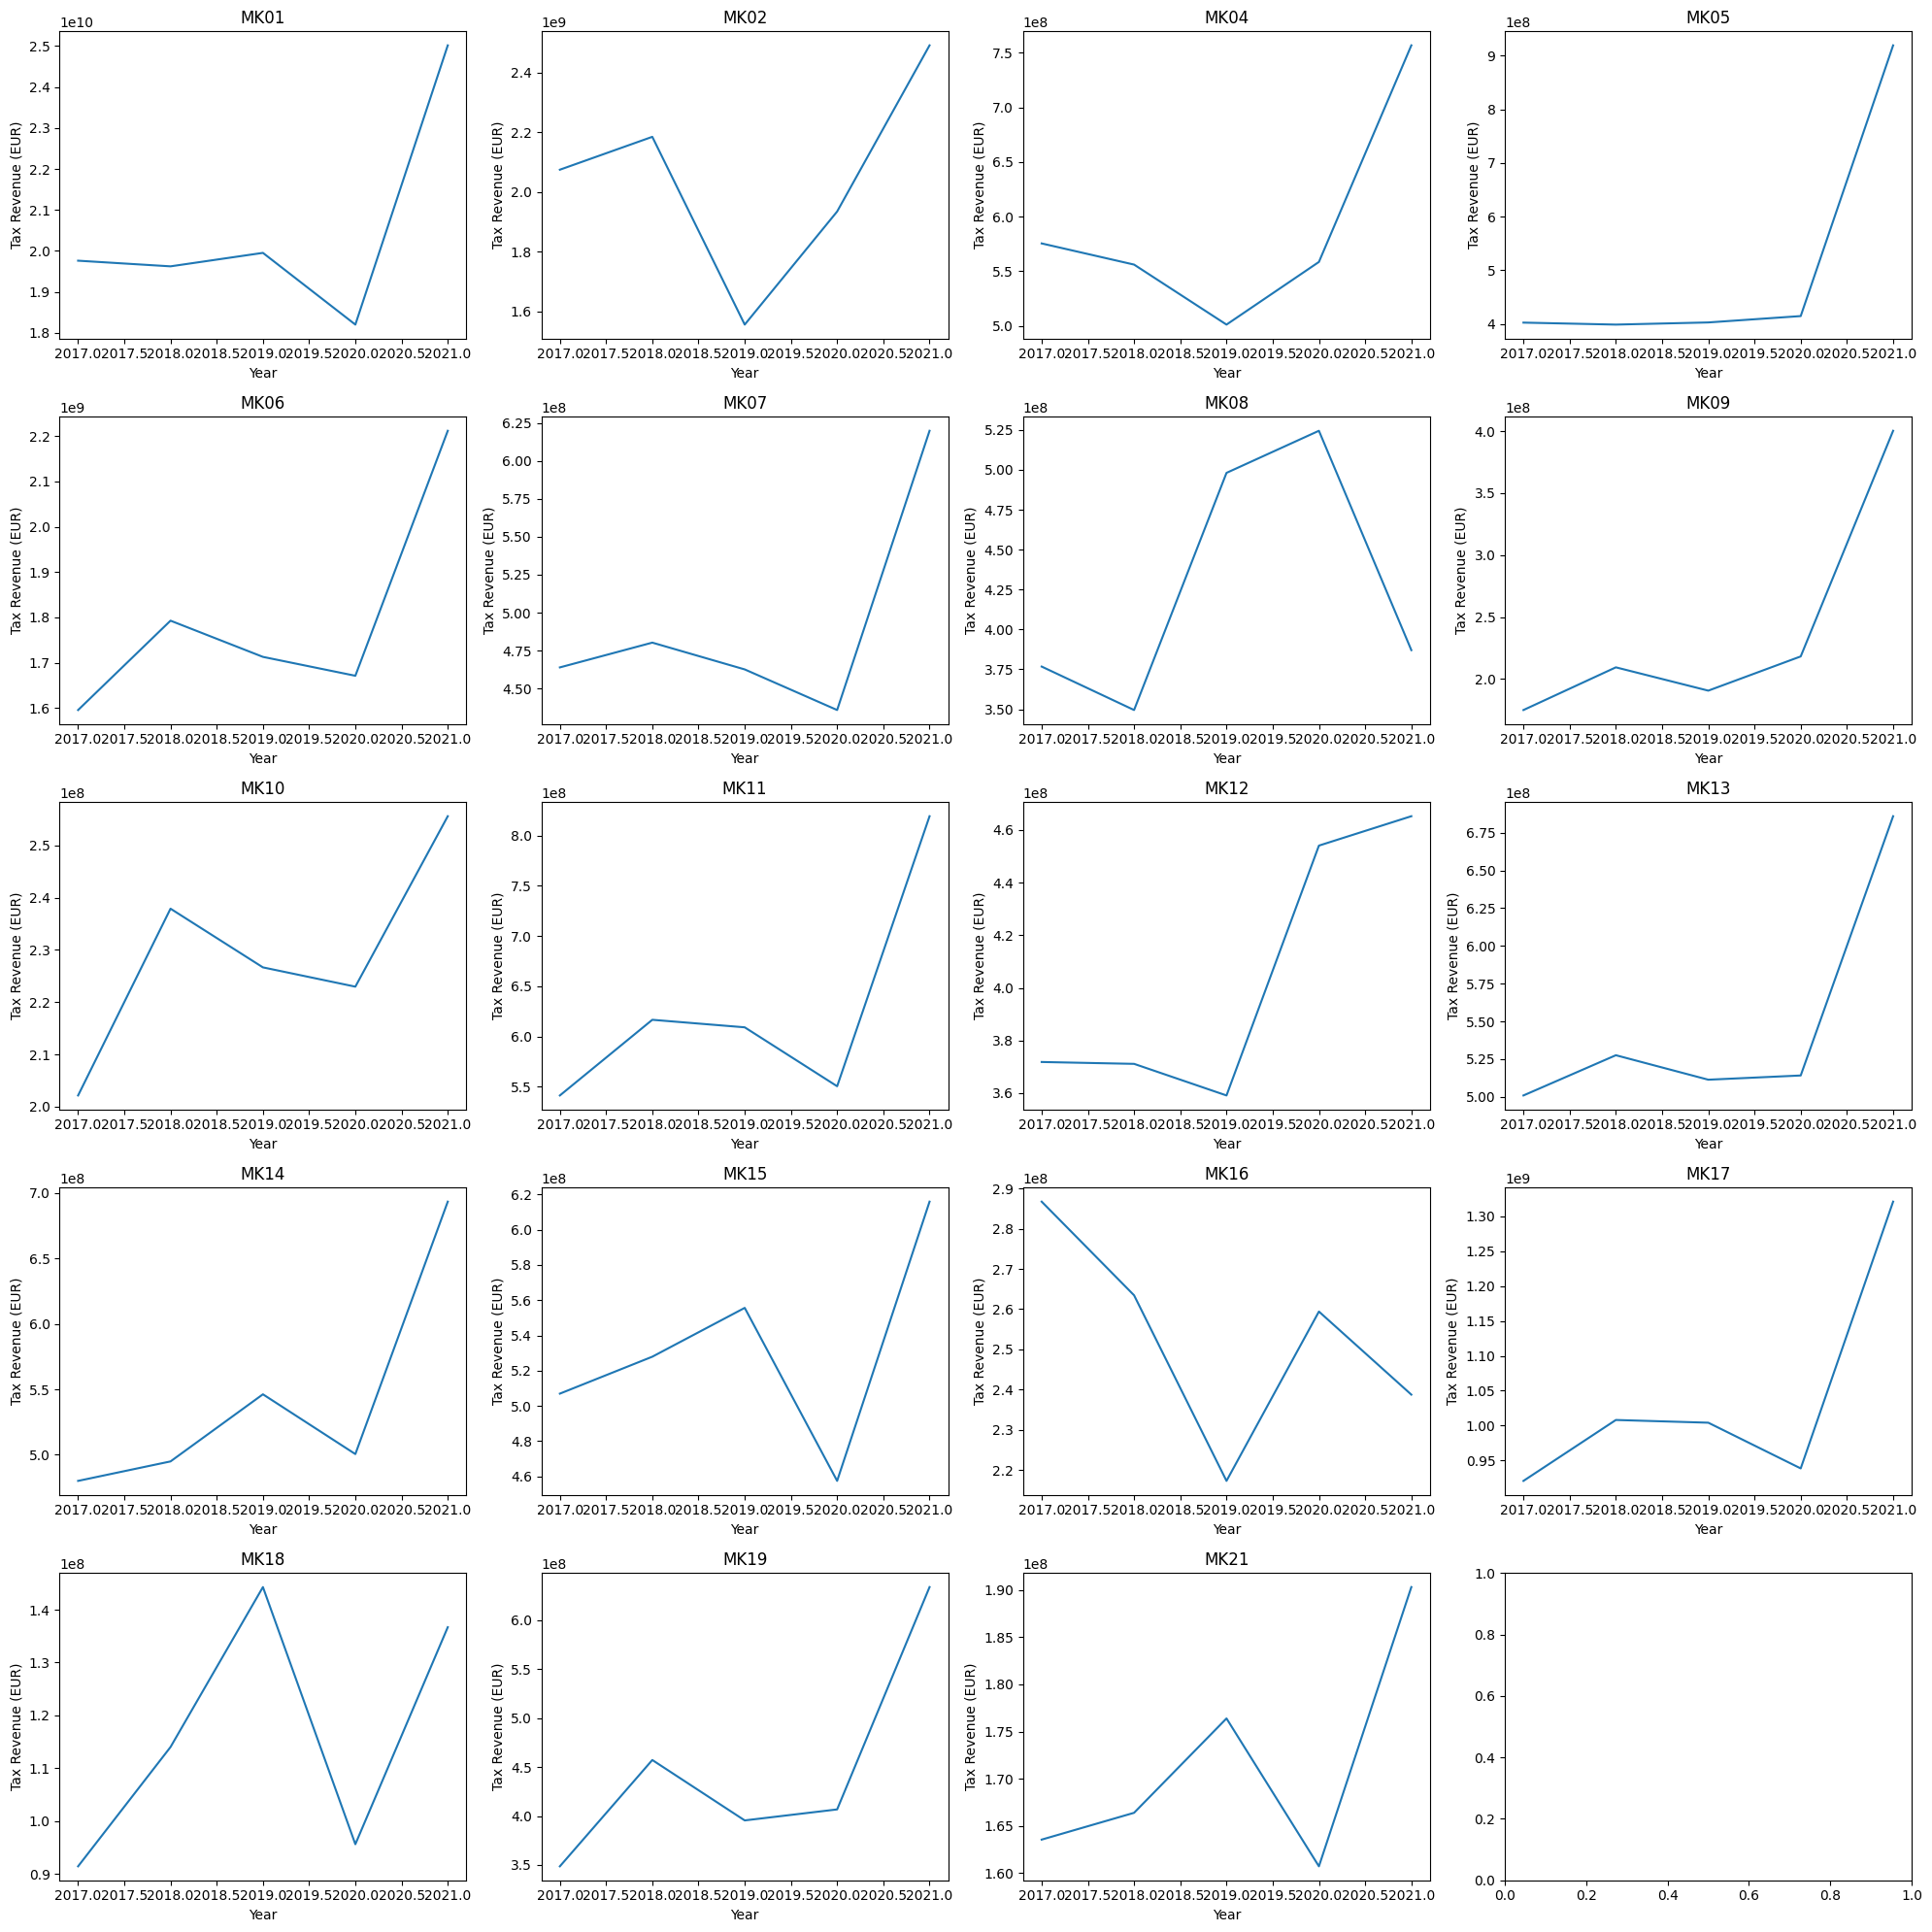

In [11]:
visualize_all_regions()

## LinearRegression model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_future_forecast_df(forecast_df, future_years, region):
    future_forecast_df = forecast_df[forecast_df['Year'].isin(future_years)].copy()
    future_forecast_df = future_forecast_df[['Year', 'Forecast']].copy()
    future_forecast_df.columns = ['Year', region]
    return future_forecast_df
    

def report_region_data(region, df, ax, dfs):
    '''Create forecast and visualize Tax Revenue of the given region with Linear Regression'''

    # Get the region's data
    df_region = get_region_data(region_code=region, df=df)
    df_region.reset_index(inplace=True)
    df_region['Year'] = df_region['Year'].astype(int)

    train_data = df_region.copy()

    # Create a LinearRegression model
    model = LinearRegression()

    # Fit the model to the data
    model.fit(train_data['Year'].values.reshape(-1, 1), train_data['Tax Revenue (EUR)'])

    # Forecast for the training and test data
    train_forecast = model.predict(train_data['Year'].values.reshape(-1, 1))

    # Calculate the training and testing error (Mean Absolute Error, MAE)
    train_data['Forecast'] = train_forecast
    train_mae = mean_absolute_error(train_data['Tax Revenue (EUR)'], train_forecast)

    # Forecast for the next 3 years outside the scope of data
    num_years_to_forecast = 3
    last_year = df_region['Year'].max()
    forecast_years = np.arange(last_year + 1, last_year + num_years_to_forecast + 1)
    forecast_df = pd.DataFrame({'Year': forecast_years})
    forecast = model.predict(forecast_df['Year'].values.reshape(-1, 1))
    # forecast.index = range(len(forecast))
    forecast_df['Forecast'] = forecast

    # Save the future forecast of this region into the list of future forecasts for all regions
    future_forecast_df = get_future_forecast_df(forecast_df, forecast_years, region)
    dfs.append(future_forecast_df)

    # Plot the region's data on the subplot
    ax.plot(train_data['Year'], train_data['Tax Revenue (EUR)'], label='Train Data', marker='o', markersize=6, color='blue')

    # Plot the training and test forecasts
    ax.plot(train_data['Year'], train_data['Forecast'], label='Train Forecast', linestyle='dashed', color='red')
    ax.plot(forecast_df['Year'], forecast_df['Forecast'], label='Test & Future Forecast', linestyle='dashed', color='black')

    # Set x-ticks for every year
    ax.set_xticks(range(train_data['Year'].min(), forecast_years[-1] + 1))
    ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.set_title(f'Forecast Tax Revenue (EUR) in {region} - Train error: {train_mae:.2f}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Tax Revenue (EUR)')

    # Annotate the test and forecast points
    forecast_years_to_annotate = forecast_df['Year'].iloc[-num_years_to_forecast:]
    forecast_values_to_annotate = forecast[-num_years_to_forecast:]
    for year, value in zip(forecast_years_to_annotate, forecast_values_to_annotate):
        ax.scatter(year, value, marker='o', color='black')
        ax.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0, 10), ha='center', color='black')

    ax.legend(loc='upper left')
    ax.grid(True)


def forecast_and_visualize_all_regions(func):
    '''Create a 5x4 plot of forecasts for each region using the given function'''
    dfs = []
    fig, axes = plt.subplots(5, 4, figsize=(30, 30))
    axes = axes.flatten()
    for i, region in enumerate(DATA['Region code'].unique()):
        func(region, DATA, axes[i], dfs)
    plt.tight_layout()
    plt.show()

    return dfs


def future_forecast_all_regions(dfs):
    '''Create a DataFrame with the future forecasts of all regions'''
    df = pd.DataFrame({'Year': dfs[0]['Year']})
    for region in dfs:
        df = pd.merge(df, region, on='Year', how='inner')
    return df

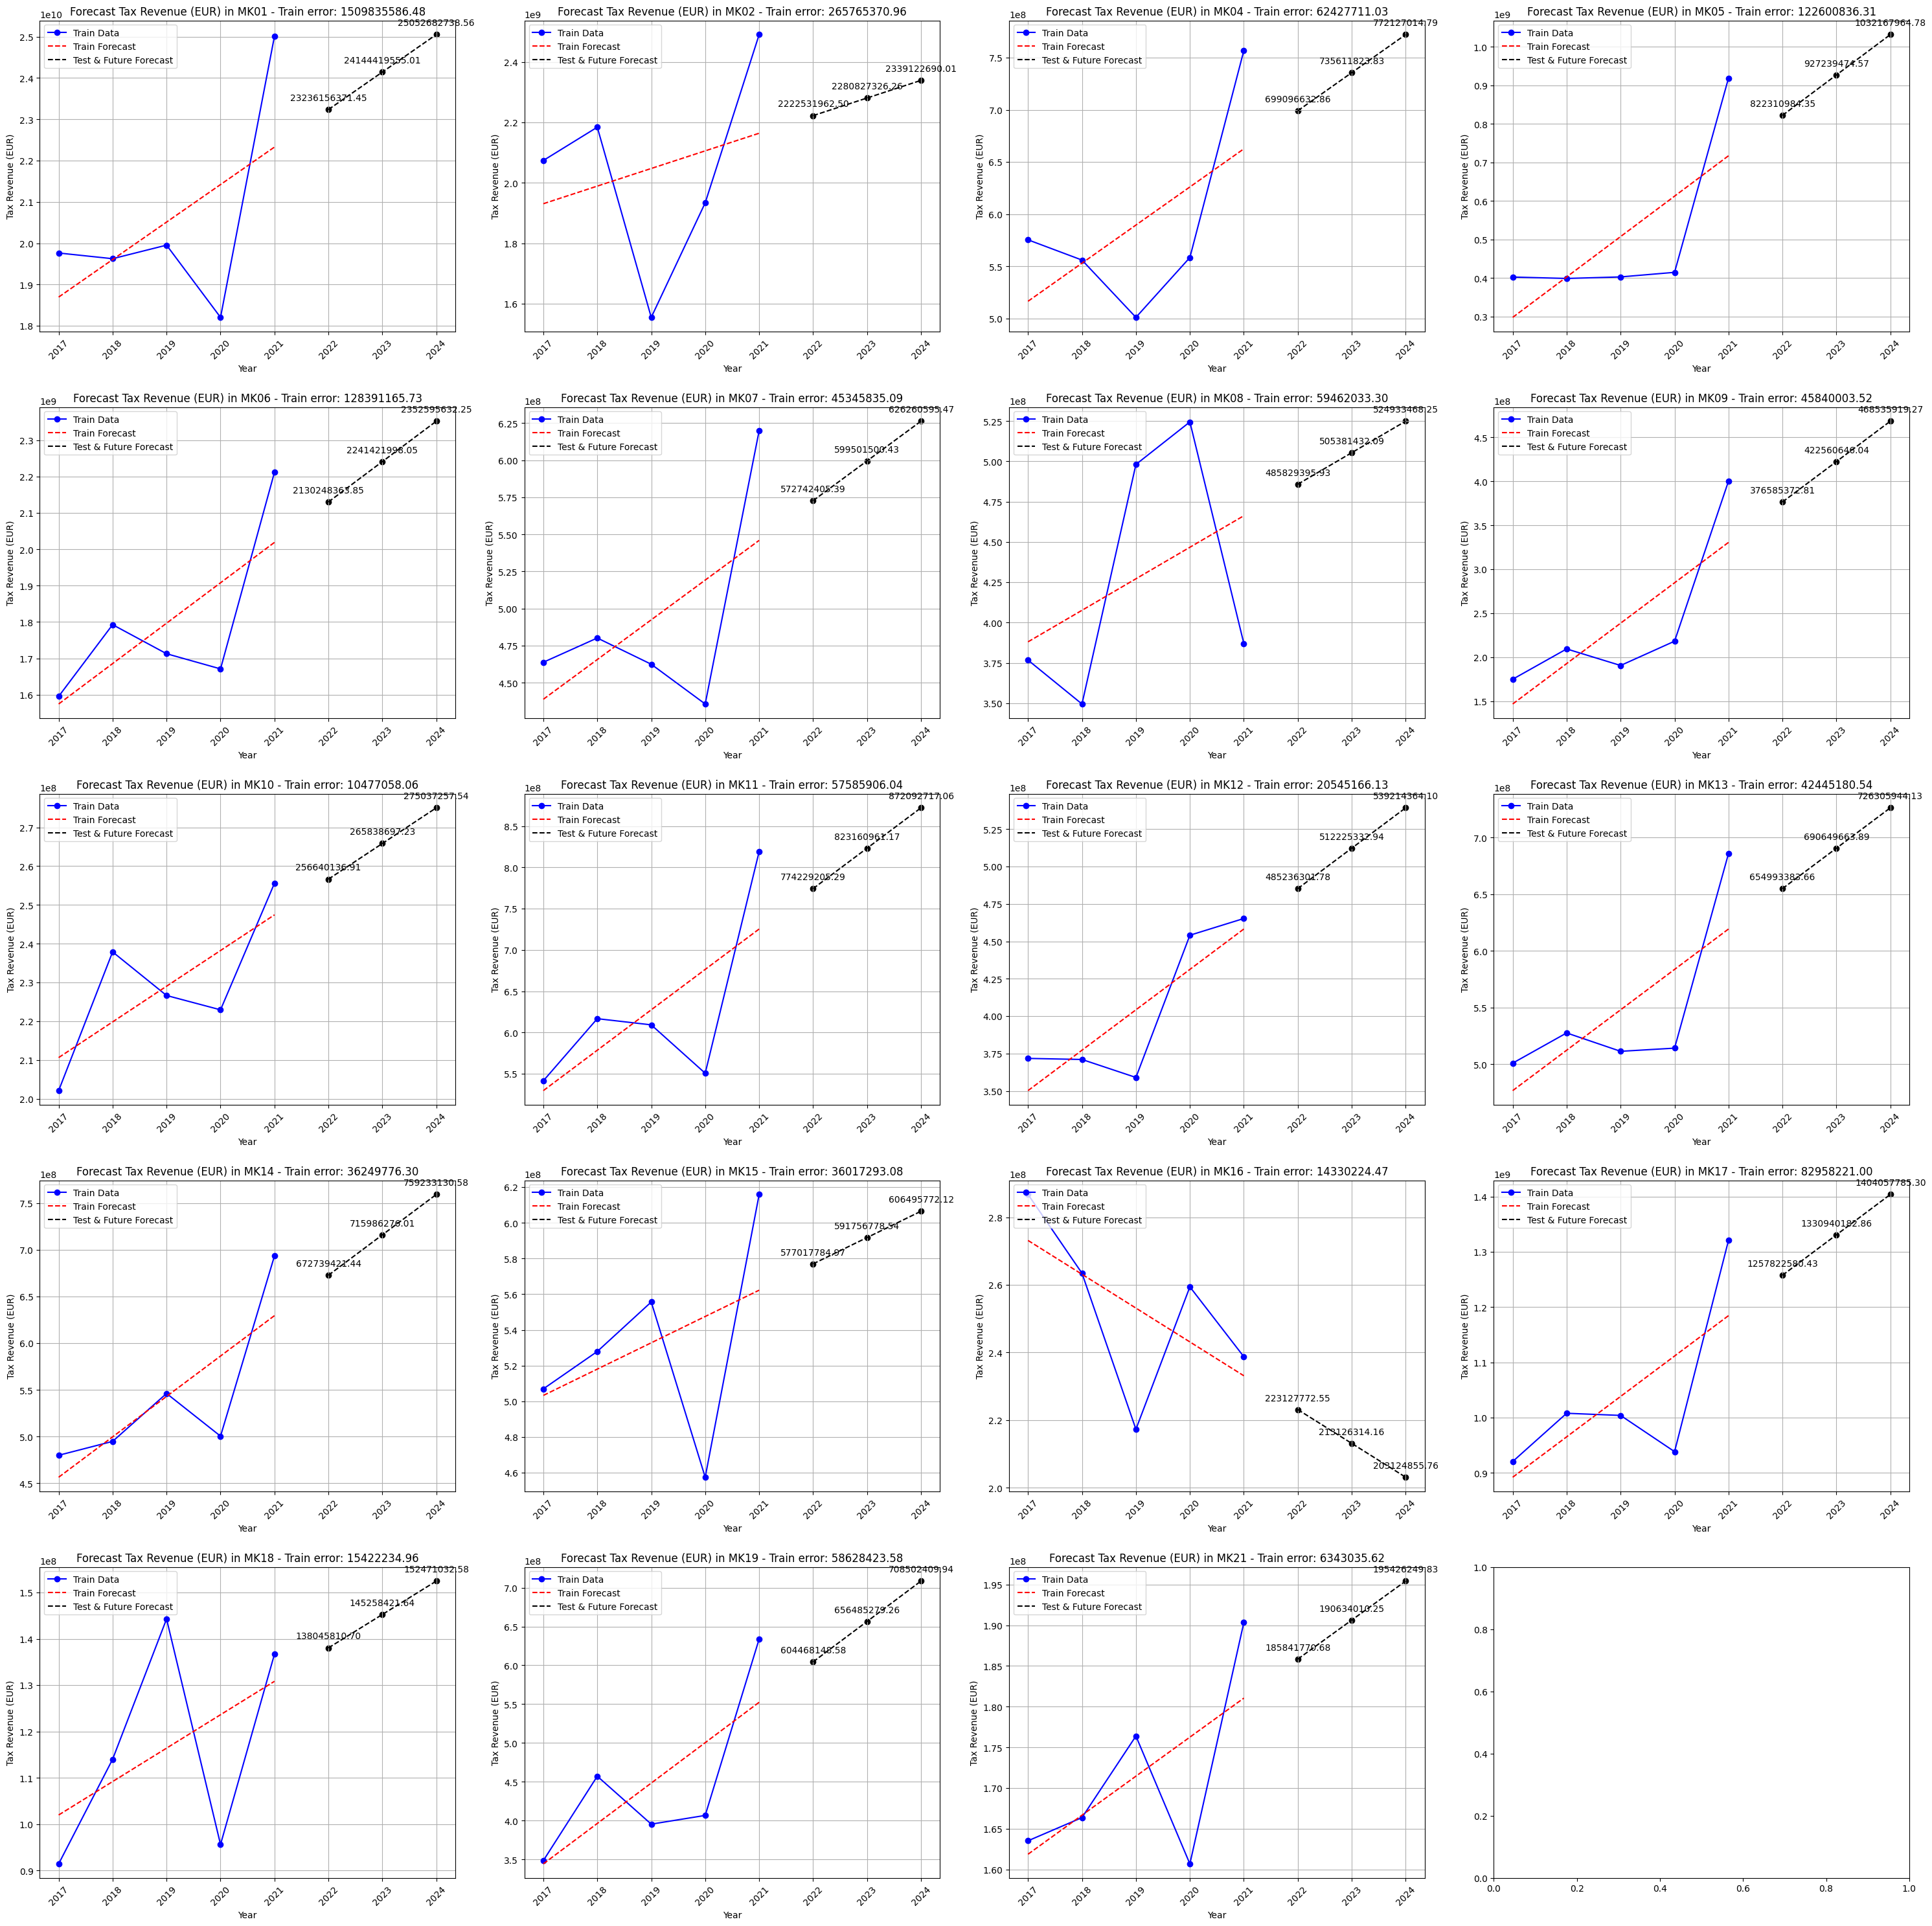

,Year,MK01,MK02,MK04,MK05,MK06,MK07,MK08,MK09,MK10,MK11,MK12,MK13,MK14,MK15,MK16,MK17,MK18,MK19,MK21
0,2022,2.323616e+10,2.222532e+09,6.990966e+08,8.223110e+08,2.130248e+09,5.727424e+08,4.858294e+08,3.765854e+08,2.566401e+08,7.742292e+08,4.852363e+08,6.549934e+08,6.727394e+08,5.770178e+08,2.231278e+08,1.257823e+09,1.380458e+08,6.044681e+08,1.858418e+08
1,2023,2.414442e+10,2.280827e+09,7.356118e+08,9.272395e+08,2.241422e+09,5.995015e+08,5.053814e+08,4.225606e+08,2.658387e+08,8.231610e+08,5.122253e+08,6.906497e+08,7.159863e+08,5.917568e+08,2.131263e+08,1.330940e+09,1.452584e+08,6.564853e+08,1.906340e+08
2,2024,2.505268e+10,2.339123e+09,7.721270e+08,1.032168e+09,2.352596e+09,6.262606e+08,5.249335e+08,4.685359e+08,2.750373e+08,8.720927e+08,5.392144e+08,7.263059e+08,7.592331e+08,6.064958e+08,2.031249e+08,1.404058e+09,1.524710e+08,7.085024e+08,1.954262e+08


In [15]:
# Forecast + visualize all regions Tax Revenue (EUR)
tax_all = forecast_and_visualize_all_regions(report_region_data)

tax_all = future_forecast_all_regions(tax_all)
tax_all

In [34]:
historical = DATA.copy()
forecast = tax_all.copy()

In [35]:
historical = pd.pivot_table(historical, values='Tax Revenue (EUR)', index=['Year'], columns=['Region code'])
historical.columns.name = None
historical.reset_index(inplace=True)

In [36]:
display(historical)
display(forecast)

,Year,MK01,MK02,MK04,MK05,MK06,MK07,MK08,MK09,MK10,MK11,MK12,MK13,MK14,MK15,MK16,MK17,MK18,MK19,MK21
0,2017,1.976216e+10,2.074112e+09,5.754111e+08,4.024236e+08,1.595312e+09,4.638838e+08,3.767499e+08,1.748856e+08,2.021320e+08,5.414627e+08,3.718110e+08,5.009635e+08,4.800052e+08,5.069971e+08,2.867396e+08,9.206865e+08,9.143334e+07,3.486160e+08,1.635309e+08
1,2018,1.962438e+10,2.184247e+09,5.560248e+08,3.987282e+08,1.792653e+09,4.802162e+08,3.495219e+08,2.093584e+08,2.378900e+08,6.167046e+08,3.710995e+08,5.276118e+08,4.948826e+08,5.279437e+08,2.634516e+08,1.008005e+09,1.140098e+08,4.572438e+08,1.663758e+08
2,2019,1.995284e+10,1.555142e+09,5.010921e+08,4.027449e+08,1.712680e+09,4.625520e+08,4.980936e+08,1.905310e+08,2.266510e+08,6.092223e+08,3.590870e+08,5.114006e+08,5.461804e+08,5.556511e+08,2.173066e+08,1.004100e+09,1.442883e+08,3.955212e+08,1.763903e+08
3,2020,1.820357e+10,1.934031e+09,5.584560e+08,4.146014e+08,1.670971e+09,4.357728e+08,5.244601e+08,2.181634e+08,2.229592e+08,5.506126e+08,4.540854e+08,5.141918e+08,5.004907e+08,4.574966e+08,2.594099e+08,9.385614e+08,9.561442e+07,4.067583e+08,1.606967e+08
4,2021,2.501388e+10,2.490697e+09,7.567714e+08,9.191295e+08,2.212021e+09,6.199009e+08,3.870410e+08,4.003594e+08,2.555902e+08,8.191675e+08,4.652632e+08,6.859549e+08,6.934354e+08,6.159156e+08,2.387531e+08,1.320996e+09,1.366941e+08,6.339444e+08,1.903316e+08


,Year,MK01,MK02,MK04,MK05,MK06,MK07,MK08,MK09,MK10,MK11,MK12,MK13,MK14,MK15,MK16,MK17,MK18,MK19,MK21
0,2022,2.323616e+10,2.222532e+09,6.990966e+08,8.223110e+08,2.130248e+09,5.727424e+08,4.858294e+08,3.765854e+08,2.566401e+08,7.742292e+08,4.852363e+08,6.549934e+08,6.727394e+08,5.770178e+08,2.231278e+08,1.257823e+09,1.380458e+08,6.044681e+08,1.858418e+08
1,2023,2.414442e+10,2.280827e+09,7.356118e+08,9.272395e+08,2.241422e+09,5.995015e+08,5.053814e+08,4.225606e+08,2.658387e+08,8.231610e+08,5.122253e+08,6.906497e+08,7.159863e+08,5.917568e+08,2.131263e+08,1.330940e+09,1.452584e+08,6.564853e+08,1.906340e+08
2,2024,2.505268e+10,2.339123e+09,7.721270e+08,1.032168e+09,2.352596e+09,6.262606e+08,5.249335e+08,4.685359e+08,2.750373e+08,8.720927e+08,5.392144e+08,7.263059e+08,7.592331e+08,6.064958e+08,2.031249e+08,1.404058e+09,1.524710e+08,7.085024e+08,1.954262e+08


In [37]:
final_df = pd.concat([historical, forecast], ignore_index=True)
final_df

,Year,MK01,MK02,MK04,MK05,MK06,MK07,MK08,MK09,MK10,MK11,MK12,MK13,MK14,MK15,MK16,MK17,MK18,MK19,MK21
0,2017,1.976216e+10,2.074112e+09,5.754111e+08,4.024236e+08,1.595312e+09,4.638838e+08,3.767499e+08,1.748856e+08,2.021320e+08,5.414627e+08,3.718110e+08,5.009635e+08,4.800052e+08,5.069971e+08,2.867396e+08,9.206865e+08,9.143334e+07,3.486160e+08,1.635309e+08
1,2018,1.962438e+10,2.184247e+09,5.560248e+08,3.987282e+08,1.792653e+09,4.802162e+08,3.495219e+08,2.093584e+08,2.378900e+08,6.167046e+08,3.710995e+08,5.276118e+08,4.948826e+08,5.279437e+08,2.634516e+08,1.008005e+09,1.140098e+08,4.572438e+08,1.663758e+08
2,2019,1.995284e+10,1.555142e+09,5.010921e+08,4.027449e+08,1.712680e+09,4.625520e+08,4.980936e+08,1.905310e+08,2.266510e+08,6.092223e+08,3.590870e+08,5.114006e+08,5.461804e+08,5.556511e+08,2.173066e+08,1.004100e+09,1.442883e+08,3.955212e+08,1.763903e+08
3,2020,1.820357e+10,1.934031e+09,5.584560e+08,4.146014e+08,1.670971e+09,4.357728e+08,5.244601e+08,2.181634e+08,2.229592e+08,5.506126e+08,4.540854e+08,5.141918e+08,5.004907e+08,4.574966e+08,2.594099e+08,9.385614e+08,9.561442e+07,4.067583e+08,1.606967e+08
4,2021,2.501388e+10,2.490697e+09,7.567714e+08,9.191295e+08,2.212021e+09,6.199009e+08,3.870410e+08,4.003594e+08,2.555902e+08,8.191675e+08,4.652632e+08,6.859549e+08,6.934354e+08,6.159156e+08,2.387531e+08,1.320996e+09,1.366941e+08,6.339444e+08,1.903316e+08
5,2022,2.323616e+10,2.222532e+09,6.990966e+08,8.223110e+08,2.130248e+09,5.727424e+08,4.858294e+08,3.765854e+08,2.566401e+08,7.742292e+08,4.852363e+08,6.549934e+08,6.727394e+08,5.770178e+08,2.231278e+08,1.257823e+09,1.380458e+08,6.044681e+08,1.858418e+08
6,2023,2.414442e+10,2.280827e+09,7.356118e+08,9.272395e+08,2.241422e+09,5.995015e+08,5.053814e+08,4.225606e+08,2.658387e+08,8.231610e+08,5.122253e+08,6.906497e+08,7.159863e+08,5.917568e+08,2.131263e+08,1.330940e+09,1.452584e+08,6.564853e+08,1.906340e+08
7,2024,2.505268e+10,2.339123e+09,7.721270e+08,1.032168e+09,2.352596e+09,6.262606e+08,5.249335e+08,4.685359e+08,2.750373e+08,8.720927e+08,5.392144e+08,7.263059e+08,7.592331e+08,6.064958e+08,2.031249e+08,1.404058e+09,1.524710e+08,7.085024e+08,1.954262e+08


In [38]:
final_df.to_csv('../data/forecast_values/tax_revenue_forecast.csv', index=False)